# Linear Models Exhibition

In [1]:
# Import packages used throughout
import numpy as np
import matplotlib.pyplot as plt
from csv import reader

from sklearn import linear_model, model_selection

from from_scratch.import_data import train_test_split

## Part 1: Multiple Linear Regression


In [2]:
# Step 0: Import the necessary class
from from_scratch.linear_regression import LinearRegression

In [3]:
# Step 1: Import "Advertisting.csv"
with open("Advertising.csv", 'r') as file:
    ## Extract headers
    csv_reader = reader(file)
    feature_names = list(next(csv_reader))
    ## Extract data
    data = np.array(list(csv_reader)).T

### Section 1a: 2D Linear Regression

In [4]:
# Step 2: Extract relevant features and targets
features = data[1].reshape(1, data.shape[1]).astype("float")
targets = data[4].reshape(1, data.shape[1]).astype("float")

#### From Scratch Implementation

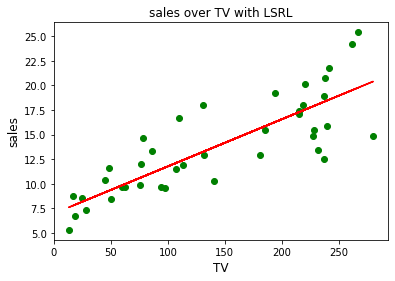

In [5]:
# Step 3: Fit a LSRL to the data and visualize
%matplotlib inline

train_features, train_targets, test_features, test_targets = train_test_split(features, targets)

model = LinearRegression()
model.fit(train_features, train_targets)
model.visualize(test_features, test_targets, [feature_names[1], feature_names[4]])

#### Scikit Implementation

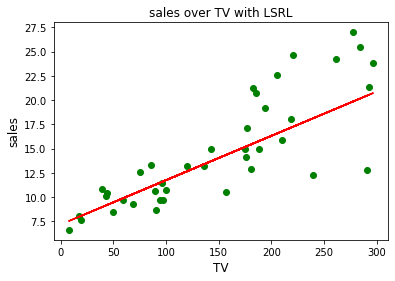

In [6]:
# Step 3: Fit a LSRL to the data and visualize
%matplotlib inline

train_features, test_features, train_targets, test_targets = model_selection.train_test_split(features.T, targets.T,
 train_size = 0.8, test_size = 0.2)

model = linear_model.LinearRegression()
model.fit(train_features, train_targets)

plt.scatter(test_features, test_targets, c = 'g', marker = 'o')
plt.plot(test_features, model.predict(test_features), c = 'r')
plt.title(f"{feature_names[4]} over {feature_names[1]} with LSRL")
plt.xlabel(feature_names[1], fontsize = 12)
plt.ylabel(feature_names[4], fontsize = 12)
plt.show()

### Section 1b: 3D Linear Regression

In [7]:
# Step 2: Extract relevant features and targets
features = data[1:3].reshape(2, data.shape[1]).astype("float")
targets = data[4].reshape(1, data.shape[1]).astype("float")

#### From Scratch Implementation

In [8]:
# Step 3: Fit a least-squares plane to the data and visualize
%matplotlib qt

train_features, train_targets, test_features, test_targets = train_test_split(features, targets)

model = LinearRegression()
model.fit(train_features, train_targets)
model.visualize(test_features, test_targets, [feature_names[1], feature_names[2], feature_names[4]])

#### Scikit Implementation

In [9]:
# Step 3: Fit a least-squares plane to the data and visualize
%matplotlib qt

train_features, test_features, train_targets, test_targets = model_selection.train_test_split(features.T, targets.T,
     train_size = 0.8, test_size = 0.2)

## Train a model
model = linear_model.LinearRegression()
model.fit(train_features, train_targets)

## Produce visualization
ax = plt.axes(projection = "3d")
ax.scatter(test_features[:,0], test_features[:,1], test_targets, c = 'g', marker = 'o')
  
X, Y = np.meshgrid(test_features[:,0], test_features[:,1])
Z = model.predict(np.vstack((X.flatten(), Y.flatten())).T).reshape(X.shape)

ax.contour3D(X, Y, Z, 50, cmap = "pink")

ax.set_title(f"{feature_names[4]} over ({feature_names[1]}, {feature_names[2]}) with Least-Squares Plane")
ax.set_xlabel(feature_names[1], fontsize = 12)
ax.set_ylabel(feature_names[2], fontsize = 12)
ax.set_zlabel(feature_names[4], fontsize = 12)
plt.show()

## Part 2: Polynomial Regression 

In [10]:
# Step 0: Import the necessary classes
from from_scratch.polynomial_regression import PolynomialRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [11]:
# Step 1: Import "bluegills.csv"
with open("bluegills.csv", 'r') as file:
    ## Extract headers
    csv_reader = reader(file)
    feature_names = list(next(csv_reader))
    ## Extract data
    data = np.array(list(csv_reader)).T

In [12]:
# Step 2: Extract relevant features and targets
features = data[0].reshape(1, data.shape[1]).astype("int")
targets = data[1].reshape(1, data.shape[1]).astype("int")

#### From Scratch Implementation

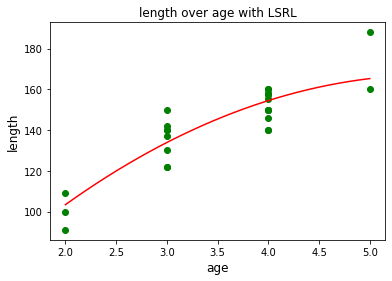

In [13]:
# Step 3: Fit a LSRL to the data and visualize
%matplotlib inline

train_features, train_targets, test_features, test_targets = train_test_split(features, targets, fraction = 0.7)

model = PolynomialRegression(degree = 3)
model.fit(train_features, train_targets)
model.visualize(test_features, test_targets, [feature_names[0], feature_names[1]])

#### Scikit Implementation

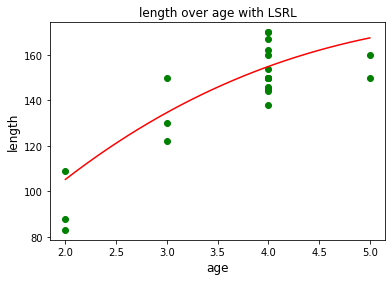

In [14]:
# Step 3: Fit a LSRL to the data and visualize
%matplotlib inline

train_features, test_features, train_targets, test_targets = model_selection.train_test_split(features.T, targets.T, train_size = 0.7, test_size = 0.3)

polyreg = make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression())
polyreg.fit(train_features, train_targets)

# Define line
minimum = test_features.min()
maximum = test_features.max()
x = np.linspace(int(minimum), int(maximum), int(10*abs(maximum-minimum)))
x = x.reshape((1, x.shape[0]))

# Plot scatterplot and line
plt.scatter(test_features, test_targets, c='g', marker='o')
plt.plot(x.T, polyreg.predict(x.T), c='r')
plt.title(f"{feature_names[1]} over {feature_names[0]} with LSRL")
plt.xlabel(feature_names[0], fontsize=12)
plt.ylabel(feature_names[1], fontsize=12)
plt.show()

## Part 3: Perceptron

In [15]:
# Step 0: Import the necessary class
from from_scratch.perceptron import Perceptron
from from_scratch.metrics import accuracy
from sklearn.datasets import make_blobs

### Section 3a: 2D Perceptron

In [16]:
# Step 1: Generate blobs of data
centers = [(-3, 3), (3, -3)]
cluster_std = [1.5, 1.5]

features, targets = make_blobs(n_samples = 100, cluster_std = cluster_std,
 centers = centers, n_features = 2)

features = features.T

targets = targets.reshape(1, targets.shape[0])
targets[0, targets[0] == 0] = -1

#### From Scratch Implementation

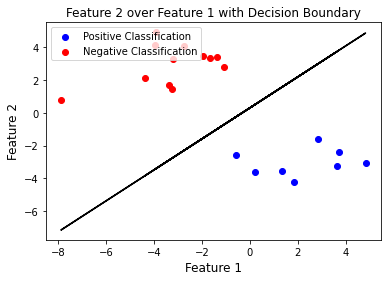

In [17]:
# Step 2: Find the decision boundary and visualize
%matplotlib inline

train_features, train_targets, test_features, test_targets = train_test_split(features, targets)

model = Perceptron()
model.fit(train_features, train_targets)
model.visualize(test_features, test_targets, ["Feature 1", "Feature 2"])

#### Scikit Implementation

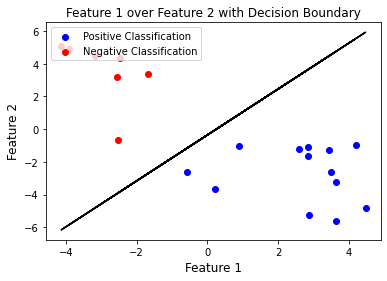

In [18]:
# Step 2: Find the decision boundary and visualize
%matplotlib inline

train_features, test_features, train_targets, test_targets = model_selection.train_test_split(features.T, targets.T, train_size = 0.8, test_size = 0.2)

model = linear_model.Perceptron()
model.fit(train_features, train_targets)

## Produce scatterplot
positive_features = test_features[test_targets[:,0] == 1, :]
negative_features = test_features[test_targets[:,0] == -1, :]
plt.scatter(positive_features[:,0], positive_features[:,1], c='b', marker='o',
            label="Positive Classification")
plt.scatter(negative_features[:,0], negative_features[:,1], c='r', marker='o',
            label="Negative Classification")

## Produce perceptron line
w_0 = model.intercept_[0]
w_1 = model.coef_[0,0]
w_2 = model.coef_[0,1]

perceptron = -(w_1/w_2)*test_features[:, 0] - (w_0/w_2)

## Plot line
plt.plot(test_features[:, 0], perceptron, c='k')

plt.legend(loc="upper left")
plt.title("Feature 1 over Feature 2 with Decision Boundary")
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.show()

### Section 3b: 3D Perceptron

In [19]:
# Step 1: Generate blobs of data
centers = [(-3, -3, -3), (3, 3, 3)]
cluster_std = [1.5, 1.5]

features, targets = make_blobs(n_samples = 100, cluster_std = cluster_std,
 centers = centers, n_features = 3)

features = features.T

targets = targets.reshape(1, targets.shape[0])
targets[0, targets[0] == 0] = -1

### From Scratch Implementation

In [20]:
# Step 2: Find the decision boundary and visualize
%matplotlib qt

train_features, train_targets, test_features, test_targets = train_test_split(features, targets)

model = Perceptron()
model.fit(train_features, train_targets)
model.visualize(test_features, test_targets, axes_labels=["Features 1", "Features 2", "Feature 3"])

#### Scitkit Implementation

In [21]:
# Step 2: Find the decision boundary and visualize
%matplotlib qt

train_features, test_features, train_targets, test_targets = model_selection.train_test_split(features.T, targets.T, train_size = 0.8, test_size = 0.2)

model = linear_model.Perceptron()
model.fit(train_features, train_targets)

# Produce scatterplot
ax = plt.axes(projection = "3d")

positive_features = test_features[test_targets[:,0] == 1, :]
negative_features = test_features[test_targets[:,0] == -1, :]
ax.scatter(positive_features[:,0], positive_features[:,1], positive_features[:,2],             c='b', marker='o', label="Positive Classification")
ax.scatter(negative_features[:,0], negative_features[:,1], negative_features[:,2],             c='r', marker='o', label="Negative Classification")

# Produce perceptron plane 
minX = test_features[:, 0].min()
maxX = test_features[:, 0].max()
x = np.linspace(int(minX), int(maxX), 10)
x = x.reshape((1, x.shape[0]))

minY = test_features[:, 1].min()
maxY = test_features[:, 1].max()
y = np.linspace(int(minY), int(maxY), 10)
y = y.reshape((1, y.shape[0]))

X, Y = np.meshgrid(x, y)

w_0 = model.intercept_[0]
w_1 = model.coef_[0, 0]
w_2 = model.coef_[0, 1]
w_3 = model.coef_[0, 2]

perceptron = -(w_1/w_3)*X - (w_2/w_3)*Y - (w_0/w_3)

# Plot line
ax.contour3D(X, Y, perceptron, 50, cmap = "binary")

ax.legend(loc="upper left")
ax.set_title("Feature 3 over (Feature 1, Feature 2) with Decision Boundary")
ax.set_xlabel("Feature 1", fontsize=12)
ax.set_ylabel("Feature 2", fontsize=12)
ax.set_zlabel("Feature 3", fontsize=12)
plt.show()